# Graph For arousal

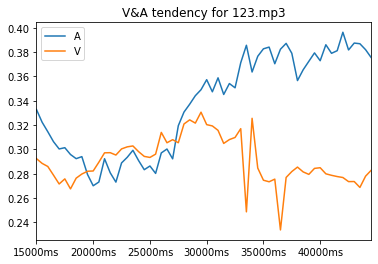

In [25]:
song_id = 123

import pandas as pd
import matplotlib.font_manager as fm

a = pd.read_csv('../dataset/arousal.csv')

a = a.loc[a['song_id'] == song_id,'sample_15000ms' : 'sample_44500ms']

time_interval = a.columns.values
acrosual = a.values[0]


#Valance
v = pd.read_csv('../dataset/valence.csv')

v = v.loc[v['song_id'] == song_id,'sample_15000ms' : 'sample_44500ms']

valance = v.values[0]
#remove samples and ms in time interval
for idx,_ in enumerate(time_interval):
    time_interval[idx] = time_interval[idx].replace("sample_","")
df = pd.DataFrame({
    'A': acrosual,
    'V': valance
},index=time_interval)
df.plot.line(title="V&A tendency for {}.mp3".format(song_id))

## Dataset Distributions

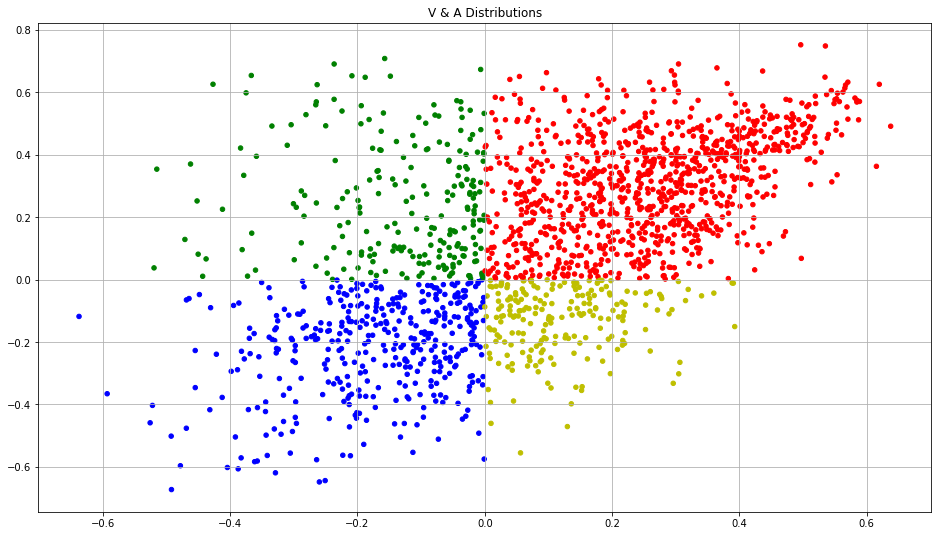

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('../dataset/dataset_nor_zsocre.csv')

v = data['v']
a = data['a']
colors = [''] * len(v)
for idx,_ in enumerate(v):
    x = v[idx]
    y = a[idx]
    if x > 0 and y > 0: #第1象限
        colors[idx] = 'r'
    elif x < 0 and y > 0: #第2象限
        colors[idx] = 'g'
    elif x < 0 and y < 0: #第3象限
        colors[idx] = 'b'
    elif x > 0 and y < 0: #第4象限
        colors[idx] = 'y'
plt.scatter(v,a,s=20,c=colors)
plt.title('V & A Distributions')
plt.grid()
plt.rcParams["figure.figsize"] = [16,9]

plt.show()


## Feature graph

In [8]:
song_id = 10

import pandas as pd
from scipy import stats
from sklearn import preprocessing
import json

file = "../dataset/song_features/{}.csv".format(song_id)
data = pd.read_csv(file,sep=";")[32:91]
#data = data.drop(columns=['frameTime'])

mm_scaler = preprocessing.MinMaxScaler()

featureSet = {}
N_OF_FEATURE = 260
counter = 0
for col in data.columns.values:
    #featureSet[col] =data[col].tolist()
    if(counter > N_OF_FEATURE): break
    featureSet[col] = [np.mean(mm_scaler.fit_transform(np.array(data[col]).reshape(-1, 1)).reshape(-1))]
    counter = counter +1

    df = pd.DataFrame(featureSet)
#print(df)

df.plot(legend=False,figsize=(20,5),kind='bar',width=30, linewidth=1,edgecolor ='black')


ModuleNotFoundError: No module named 'scipy'